In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Data Variance Analysis

### a) Vector Interpretation

The vector **x** is a vector in 3-D space starting at (0, 0, 0) and ending at point (1, 2, 3).

Individual observations are represented as vectors in ML because it allows features to be represented mathemetically. This lets us perform mathematical computations and operations to find some insight on the dataset.

### b) Eigenvalue Insight

The largest eigenvalue tells us that there is a variance of 5.67 in the direction of its associated eigenvector. This eigenvector would then give us the direction in which the projected data would have the most information.

### c) Eigenvectors and Dimensionality Reduction (PCA)

This direction is the "most informative" because it has the most variance where data is the most spread. This means that there is a lot more significance in the data in this direction vs. a potential for noise when data is too clustered when there is low variance.

### d) Practical Data Science Interpretation

Dimensionality reduction removes dimensions with lower variance. With fewer dimensions, ML models are simplified. This means that model training is faster with fewer dimensions and prediction is better with less noise.

## Problem 2: A Simple Dimensionality Reduction

In [54]:
# a) Create a 10x2 NumPy array with elements in D. Find the covariance matrix.

D_data = [
    [1.72, 0.10], [-0.58, 0.31], [1.99, 1.54], [1.60, 4.97], [2.72, 2.43],
    [2.83, 3.59], [5.95, 7.71], [4.75, 7.63], [5.57, 5.60], [9.82, 7.91]
]

D = np.array(D_data)

covarD = np.cov(D, rowvar = False)
print(f"a) Covariance matrix of D:\n{covarD}")

a) Covariance matrix of D:
[[8.70742333 7.41923   ]
 [7.41923    9.21336556]]


In [69]:
# b) Find eigenvalues and corresponding eigenvectors of covarD using NumPy linalg. Name the eigenvector with the most variance, v.
print("b)")

eigenvalues, eigenvectors = np.linalg.eig(covarD)
print(f"Eigenvalue/vector 1: {eigenvalues[0]}, {eigenvectors[:, 0]}")
print(f"Eigenvalue/vector 2: {eigenvalues[1]}, {eigenvectors[:, 1]}")

v  = eigenvectors[:, np.argmax(eigenvalues)]
print(f"First principal component, v: {v}")

b)
Eigenvalue/vector 1: 1.5368529596841682, [-0.71905385  0.69495436]
Eigenvalue/vector 2: 16.383935929204718, [-0.69495436 -0.71905385]
First principal component, v: [-0.69495436 -0.71905385]


In [66]:
# c) Map all data points of D onto v using the dot product.

# center D about the origin
mean = np.mean(D, axis = 0)
D_centered = D - mean

projection_points = np.dot(D_centered, v)
projection = np.outer(projection_points, v) + mean

print(f"c) Projection/mapping of D onto v: {projection_points}")

c) Projection/mapping of D onto v: [ 4.26524816  5.71264188  3.04217294  0.84685043  1.89489833  0.98435089
 -4.14640858 -3.25493904 -2.3651223  -6.97969272]


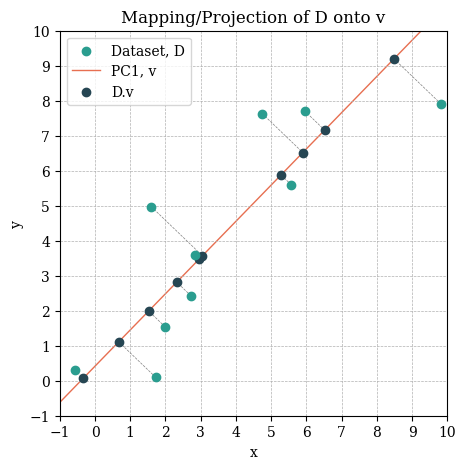

In [67]:
# eigenvector, v (centered and extended)
v_line = np.array([
    mean - 10 * v,
    mean + 10 * v
])

# initialize plot
plt.figure(figsize = (5, 5))

# plot data: D, v, projection
plt.scatter(D[:, 0], D[:, 1],
            color = "#2a9d8f", alpha = 1, label = "Dataset, D", zorder = 4)
plt.plot(v_line[:, 0], v_line[:, 1],
         color = "#e76f51", label = "PC1, v", linewidth = 1, zorder = 1)
plt.scatter(projection[:, 0], projection[:, 1],
            color = "#264653", label = "D.v", zorder = 3)

# draw lines from D points to projection
for i in range(D.shape[0]):
    plt.plot([D[i, 0], projection[i, 0]],
    [D[i, 1], projection[i, 1]],
    color = "gray", linestyle = "--", linewidth = 0.5)

# plot settings
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["DejaVu Serif"]
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xticks(np.arange(-1, 11, 1))
plt.yticks(np.arange(-1, 11, 1))
plt.grid(True, which = "both", linestyle = "--", linewidth = 0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapping/Projection of D onto v")
plt.legend()
plt.show()